<h1>Mis notas: NumPy<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Arrays" data-toc-modified-id="Arrays-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Arrays</a></span><ul class="toc-item"><li><span><a href="#Creación" data-toc-modified-id="Creación-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creación</a></span></li><li><span><a href="#Representación" data-toc-modified-id="Representación-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Representación</a></span></li><li><span><a href="#Atributos" data-toc-modified-id="Atributos-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Atributos</a></span></li><li><span><a href="#Indexado" data-toc-modified-id="Indexado-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Indexado</a></span></li><li><span><a href="#Slicing" data-toc-modified-id="Slicing-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Slicing</a></span></li><li><span><a href="#Sub-arrays" data-toc-modified-id="Sub-arrays-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Sub-arrays</a></span></li><li><span><a href="#Copia" data-toc-modified-id="Copia-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Copia</a></span></li><li><span><a href="#Reformateo" data-toc-modified-id="Reformateo-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Reformateo</a></span></li><li><span><a href="#Concatenación" data-toc-modified-id="Concatenación-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Concatenación</a></span></li><li><span><a href="#División" data-toc-modified-id="División-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>División</a></span></li><li><span><a href="#Arrays-de-fechas" data-toc-modified-id="Arrays-de-fechas-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Arrays de fechas</a></span></li></ul></li><li><span><a href="#Funciones-universales-de-NumPy" data-toc-modified-id="Funciones-universales-de-NumPy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Funciones universales de NumPy</a></span><ul class="toc-item"><li><span><a href="#Funciones-aritméticas" data-toc-modified-id="Funciones-aritméticas-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Funciones aritméticas</a></span></li><li><span><a href="#Funciones-comparativas" data-toc-modified-id="Funciones-comparativas-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Funciones comparativas</a></span></li><li><span><a href="#Funciones-lógicas" data-toc-modified-id="Funciones-lógicas-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Funciones lógicas</a></span></li><li><span><a href="#Funciones-para-arrays-booleanos" data-toc-modified-id="Funciones-para-arrays-booleanos-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Funciones para arrays booleanos</a></span></li><li><span><a href="#Valor-absoluto" data-toc-modified-id="Valor-absoluto-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Valor absoluto</a></span></li><li><span><a href="#Funciones-trigonométricas" data-toc-modified-id="Funciones-trigonométricas-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Funciones trigonométricas</a></span></li><li><span><a href="#Funciones-exponenciales-y-logarítmicas" data-toc-modified-id="Funciones-exponenciales-y-logarítmicas-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Funciones exponenciales y logarítmicas</a></span></li><li><span><a href="#Otras-funciones" data-toc-modified-id="Otras-funciones-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Otras funciones</a></span></li><li><span><a href="#Funciones-especializadas" data-toc-modified-id="Funciones-especializadas-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Funciones especializadas</a></span></li><li><span><a href="#Agregados" data-toc-modified-id="Agregados-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Agregados</a></span></li><li><span><a href="#Producto-tensorial" data-toc-modified-id="Producto-tensorial-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Producto tensorial</a></span></li></ul></li><li><span><a href="#Agregaciones" data-toc-modified-id="Agregaciones-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Agregaciones</a></span></li><li><span><a href="#Broadcasting" data-toc-modified-id="Broadcasting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Broadcasting</a></span></li><li><span><a href="#Indexado-múltiple" data-toc-modified-id="Indexado-múltiple-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Indexado múltiple</a></span></li><li><span><a href="#Ordenación-de-arrays" data-toc-modified-id="Ordenación-de-arrays-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ordenación de arrays</a></span><ul class="toc-item"><li><span><a href="#Ejemplo:-KNN-(K-Nearest-Neighbours)" data-toc-modified-id="Ejemplo:-KNN-(K-Nearest-Neighbours)-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Ejemplo: KNN (K-Nearest Neighbours)</a></span></li></ul></li><li><span><a href="#Arrays-estructurados" data-toc-modified-id="Arrays-estructurados-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Arrays estructurados</a></span></li></ul></div>

> **Disclaimer**: Este notebook contiene mis notas sobre NumPy, cogiendo lo más útil del [capítulo 2](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html) de [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) escrito por [Jake VanderPlas](http://vanderplas.com/), y de la [guía rápida](https://docs.scipy.org/doc/numpy/user/quickstart.html) de NumPy. Recomiendo leer la fuente original e ir ejecutando todos los ejemplos (___learn by doing!___).

## Intro

[NumPy](http://www.numpy.org/) (Numerical Python) es una librería fundamental para cálculo científico en Python, preparada para tratar grandes cantidades de datos. Los arrays de NumPy proporcionan almacenamiento y operaciones mucho más eficientes que los arrays estándar de Python, lo que requerimos cuando los datos empiezan a crecer. Esto convierte a NumPy en parte indispensable dentro del ecosistema de Data Science con Python.

Para poder usar NumPy, simplemente tendremos que importar la librería :)

In [1]:
# NumPy suele importarse con el alias np
import numpy as np
np?

Igual que un tipo básico en Python es más que un simple valor debido al tipado dinámico (en realidad se trata de una estructura de C), una lista es más que una simple colección de objetos uniformes, pudiendo albergar todo tipo de objetos simultáneamente. 

Esta flexibilidad tiene un precio, ya que cada objeto en una lista debe incluir información del tipo (entre otras cosas). En el caso de que todos los elementos fueran de un mismo tipo podríamos eliminar la redundancia para ganar en eficiencia de almacenado; y esto es precisamente lo que aporta el objeto `array` disponible en Python desde la versión 3.3.

El objeto `ndarray` de NumPy (o array de NumPy a secas) aparte de las ventajas del array de Python aporta también una serie de operaciones eficientes sobre sus datos.

## Arrays

Todos los elementos de un objeto ndarray son del mismo tipo.

> Lista de tipos básicos para arrays de NumPy: [Doc:  Data types](https://docs.scipy.org/doc/numpy/user/basics.types.html)

### Creación

Podemos crear arrays en NumPy **a partir de listas o tuplas** de Python, usando el método `array()`

Si se construyen con elementos de distintos tipos, NumPy intentará el ***upcasting*** automático. Si eso no es posible, obtendremos un error.

In [2]:
# Ejemplo de creación a partir de una lista
np.array([1, 2, 3])

array([1, 2, 3])

In [3]:
# Ejemplo de creación a partir de una tupla, especificando el tipo deseado
np.array((1, 2, 3), dtype=float)

array([1., 2., 3.])

In [4]:
# Ejemplo de creación con elementos de tipo int y float => upcasting automático a float
np.array([1, 2.5, 3])

array([1. , 2.5, 3. ])

In [5]:
# Ejemplo de creación con elementos de tipo numérico y texto => upcasting automático a cadenas de texto
np.array([1, '2.5', 3.1])

array(['1', '2.5', '3.1'], dtype='<U11')

También podemos crear arrays sin partir de una lista, **usando funciones específicas** como `arange()`, que nos permite generar una secuencia:

In [6]:
# Crear un array de números secuenciales con arange(), que es como range() de Python pero devolviendo un array
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# Crear un array de números dentro de un intervalo, indicando el salto
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

Si queremos controlar el número de elementos generados usaremos `linspace()`.

In [8]:
# Crear un array con linspace(), indicando el intervalo y el número de elementos equiespaciados
np.linspace(0, 9, 7) 

array([0. , 1.5, 3. , 4.5, 6. , 7.5, 9. ])

Para inicialización de arrays tenemos `empty()`, `zeros()` o `ones()`:

In [9]:
# Crear un array "vacío" (muestra lo que sea que haya en memoria). Útil para inicializarlo sin más.
np.empty(4) 

array([3.64635649e-303, 4.01091259e-303, 4.01091259e-303, 4.89124989e-322])

In [10]:
# Crear un array de ceros (float por defecto)
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [11]:
# Especificando el tipo...
np.zeros(5, dtype='int')

array([0, 0, 0, 0, 0])

Podemos crear también arrays **multidimensionales**:

In [12]:
# Crear un array multidimensional a partir de otros
np.array([np.zeros(3), np.ones(3)])

array([[0., 0., 0.],
       [1., 1., 1.]])

In [13]:
# Crear una matriz (array bidimensional) de 1s. Ojo cómo definimos el tipo (opción b)
np.ones((3, 3), dtype=np.int)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

Existen otras funciones útiles para inicialización, como `full()`, `zeros_like()` o `eye()`:

In [14]:
# Crear una matriz con un valor concreto. Esta vez probamos con un array de 3 dimensiones!
full = np.full((2, 2, 2), 3.14)
full

array([[[3.14, 3.14],
        [3.14, 3.14]],

       [[3.14, 3.14],
        [3.14, 3.14]]])

In [15]:
# Crea un array de ceros con la misma forma que otro array
np.zeros_like(full, dtype='int')

array([[[0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0]]])

In [16]:
# Crear una matriz identidad (diagonal de 1s)
np.eye(3, 3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Introducimos el módulo `random` para generación de **números aleatorios**, y el concepto de semilla para lograr reproducibilidad:

In [17]:
# Crear una matriz de números aleatorios entre 0 y 1
np.random.seed(0) # semilla
np.random.random((3, 3)) # o rand()

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276]])

In [18]:
# Crear una matriz de números enteros aleatorios dentro de un intervalo
np.random.randint(0, 10, (3, 3))

array([[1, 6, 7],
       [7, 8, 1],
       [5, 9, 8]])

### Representación

In [19]:
# Array de ejemplo
m = np.random.random((2, 2, 2))
m

array([[[0.0871293 , 0.0202184 ],
        [0.83261985, 0.77815675]],

       [[0.87001215, 0.97861834],
        [0.79915856, 0.46147936]]])

Así veremos un array por defecto con la función `print()`:

In [20]:
print(m)

[[[0.0871293  0.0202184 ]
  [0.83261985 0.77815675]]

 [[0.87001215 0.97861834]
  [0.79915856 0.46147936]]]


NOTA: NumPy representa la última dimensión de izquierda a derecha, la penúltima de arriba a abajo, y las siguientes de arriba a abajo separadas por un espacio. Los arrays de 1D se imprimen como filas, los 2D como matrices, y los 3D como una lista de matrices.

NumPy no representa los arrays completos por defecto si estos son grandes. Para cambiar este comportamiento usaremos lo siguiente:

In [21]:
import sys
np.set_printoptions(threshold=sys.maxsize)

### Atributos

Estos son los atributos más básicos de un array:

In [22]:
print('m.ndim =', m.ndim)          # dimensiones
print('m.shape =', m.shape)        # tamaño
print('m.size =', m.size)          # nº de elementos
print('m.dtype =', m.dtype)        # tipo
print('m.itemsize =', m.itemsize)  # tamaño de cada elemento en bytes
print('m.nbytes =', m.nbytes)      # tamaño total en bytes

m.ndim = 3
m.shape = (2, 2, 2)
m.size = 8
m.dtype = float64
m.itemsize = 8
m.nbytes = 64


### Indexado

In [23]:
# Array de ejemplo
a = np.arange(0,10); a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Podemos indexar un elemento concreto del array:

In [24]:
# Acceso a un elemento de un array unidimensional indicando su posición
a[0]

0

In [25]:
# Acceso a un elemento indicando su posición desde el final
a[-1]

9

In [26]:
# Acceso a un elemento de un array multidimensional
m[0, 0, 0] # equivalente a m[0][0][0]

0.08712929970154071

Igualmente podemos modificar su contenido:

In [27]:
# Modificación de un elemento
a[9] = 10; a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10])

In [28]:
# Modificación de varios elementos
a[[1, 3, 5, 7, 9]] = 0; a

array([0, 0, 2, 0, 4, 0, 6, 0, 8, 0])

### Slicing

Podemos acceder a parte del array:

In [29]:
a = np.arange(0,10)
# [start:stop:step]
a[0:6:2]

array([0, 2, 4])

In [30]:
# [start:stop:-step], desde el final
a[3:0:-1] # 9 8 7 6 5 4 [3 2 1] 0

array([3, 2, 1])

In [31]:
# Uno de cada 2 elementos empezando por a[1]
a[1::2]

array([1, 3, 5, 7, 9])

En arrays con más dimensiones tenemos disponible slicing múltiple. La última dimensión siempre son las columnas; y la penúltima las filas:

In [32]:
m[:1, :2, :1] 

array([[[0.0871293 ],
        [0.83261985]]])

In [33]:
m[0,...] # Equivalente a m[0,:,:]

array([[0.0871293 , 0.0202184 ],
       [0.83261985, 0.77815675]])

In [34]:
# Array Ejemplo
a_2x10 = np.array([a, a])
a_2x10

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [35]:
# Elementos de la primera columna
a_2x10[:,0]

array([0, 0])

In [36]:
# Elementos de la primera fila
a_2x10[0,:] # Equivalente a a_2x10[0]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Si iteramos sobre un array multidimensional, lo estaremos haciendo sobre sus filas (lo que se conoce como axis 0):

In [37]:
for row in a_2x10:
    print(row)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### Sub-arrays
Si creamos un sub-array y modificamos algo del mismo, **se modificará el array original**, ya que no es una copia real. Este comportamiento por defecto nos permitirá cargar parte de un dataset para operar solamente sobre esos datos, evitando cargar el array completo cuando éste es demasiado grande.

In [38]:
a_2x2 = a_2x10[:2,:2]
a_2x2

array([[0, 1],
       [0, 1]])

In [39]:
a_2x2[:,0] = [10, 10]
a_2x2

array([[10,  1],
       [10,  1]])

In [40]:
a_2x10

array([[10,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10,  1,  2,  3,  4,  5,  6,  7,  8,  9]])

### Copia
Si queremos crear una copia real (*deep copy*) de un array o parte del mismo tendremos que usar la función `copy()`

In [41]:
a_2x10_copy = a_2x10[:2,:2].copy()
a_2x10_copy

array([[10,  1],
       [10,  1]])

### Reformateo
Útil para cambiar la forma de un array, siempre que el número de elementos encaje. Contamos con la función `reshape()`:

In [42]:
# Paso de un array unidimensional (9) a uno bidimensional (3,3)
np.arange(1, 10).reshape((3, 3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [43]:
# Reformateo automático
np.arange(1, 10).reshape((3, -1)) # -1: lo que sea

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [44]:
# Paso de un array unidimensional (9) a uno bidimensional (1,9)
np.arange(1, 10).reshape((1, 9))

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

Podemos conseguir lo mismo usando corchetes y `newaxis`, que crea un nuevo eje. La nueva dimensión tendrá tamaño 1.

In [45]:
# Paso de 1D (10) a 2D (1, 10). El lugar del 1 será donde tengamos que poner np.newaxis
a[np.newaxis, :]

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [46]:
# Paso de 1D (10) a 2D (10, 1)
a[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

También podemos **transponer** un array de forma inmediata usando `.T`:

In [47]:
a_2x10.T

array([[10, 10],
       [ 1,  1],
       [ 2,  2],
       [ 3,  3],
       [ 4,  4],
       [ 5,  5],
       [ 6,  6],
       [ 7,  7],
       [ 8,  8],
       [ 9,  9]])

La función `ravel()` nos permite **aplanar** cualquier array a 1 dimensión:

In [48]:
a_2x10.ravel()

array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,
        7,  8,  9])

### Concatenación

Para la concatenación de arrays con mismas dimensiones se usa `concatenate()`:

In [49]:
# Concatenación de arrays unidimensionales
np.concatenate([a, a, a])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
# Concatenación de arrays bidimensionales con mismo tamaño; por defecto se hace por filas (eje 0)
np.concatenate([a_2x2, a_2x2]) # axis=0

array([[10,  1],
       [10,  1],
       [10,  1],
       [10,  1]])

In [51]:
# Concatenación de arrays bidimensionales por columnas
np.concatenate([a_2x2, a_2x10[:2,:3]], axis=1) # (2,2) + (2,3) válido en el eje 1, no en el 0

array([[10,  1, 10,  1,  2],
       [10,  1, 10,  1,  2]])

Para concatenación de arrays con distintas dimensiones tendremos que usar `vstack()` o `hstack()` (también válidos para mismas dimensiones). La primera es equivalente a usar `row_stack()`. La segunda se puede sustituir por `column_stack()` si no tenemos más de 2D.

In [52]:
# Concatenación para arrays con distintas dimensiones, en vertical (añadimos filas)
np.vstack([a_2x2, a_2x2[0]])

array([[10,  1],
       [10,  1],
       [10,  1]])

In [53]:
# Concatenación para arrays con mismas dimensiones, en horizontal (añadimos columnas)
np.hstack([a_2x10, a_2x2])

array([[10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1],
       [10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1]])

También podemos usar `stack()` para realizar la concatenación de una forma más generalizada (con más parámetros). Así mismo utilizaremos `dstack()` para concatenar en la tercera dimensión.

### División
La operación contraria a la concatenación es la división, que llevaremos a cabo con `split()`, `hsplit()`, `vsplit()` y `dsplit()`

In [54]:
a1, a2, a3, a4 = np.split(a, [1, 3, 6])
print(a1, a2, a3, a4)

[0] [1 2] [3 4 5] [6 7 8 9]


In [55]:
np.vsplit(a_2x10, 2)

[array([[10,  1,  2,  3,  4,  5,  6,  7,  8,  9]]),
 array([[10,  1,  2,  3,  4,  5,  6,  7,  8,  9]])]

In [56]:
np.hsplit(a, 2)

[array([0, 1, 2, 3, 4]), array([5, 6, 7, 8, 9])]

### Arrays de fechas

NumPy añadió el *dtype* `datetime64` para contar con series temporales de forma nativa. Es una representación de las fechas como enteros de 64 bits, permitiendo que los arrays sean muy compactos, y las operaciones sobre ellos muy eficientes.

In [57]:
# Inicialización de un array con una fecha
dates = np.array('2019-02-20', dtype=np.datetime64)
dates

array('2019-02-20', dtype='datetime64[D]')

La **[D]** que podemos ver entre corchetes es la unidad fundamental asignada por defecto para la entrada del ejemplo; en este caso ***Días***. Existen otros códigos que podemos indicar de forma explícita, y que nos condicionarán el intervalo de fechas representable (Y, M, W, D, h, m, s, ms, us, ns, ...).

In [58]:
# Resolución mayor
np.datetime64('2019-02-20', 'ns')

numpy.datetime64('2019-02-20T00:00:00.000000000')

Podemos crear una **serie temporal** fácilmente a partir del array previamente inicializado con una fecha:

In [59]:
dates + np.arange(15)

array(['2019-02-20', '2019-02-21', '2019-02-22', '2019-02-23',
       '2019-02-24', '2019-02-25', '2019-02-26', '2019-02-27',
       '2019-02-28', '2019-03-01', '2019-03-02', '2019-03-03',
       '2019-03-04', '2019-03-05', '2019-03-06'], dtype='datetime64[D]')

## Funciones universales de NumPy

La clave para que las operaciones sobre arrays de NumPy sean eficientes es usar **operaciones vectorizadas**; aquellas que ejecutadas sobre un vector son aplicadas sobre cada elemento. Este tipo de operaciones están implementadas en NumPy a través de sus funciones universales (**ufuncs**).

Distinguimos 2 tipos de ufuncs: ***unarias*** (una entrada) y ***binarias*** (dos).

Cada vez que veamos un bucle que actúa sobre los elementos de una colección deberíamos considerar la opción de sustituirlo por una operación vectorizada.

In [60]:
# Ejemplo con array y escalar, usando el operador universal de división
b = a / 10
b

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [61]:
# Ejemplo con 2 arrays, usando la suma
a + b

array([0. , 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

Podemos mejorar el rendimiento de una operación especificando el array de salida de la misma en el parámetro `out`, en lugar de hacer una asignación; de esa manera nos ahorraremos la creación de un array temporal y la copia de sus elementos al array final

In [62]:
# Ejemplo
y = np.zeros(10)
np.power(2, a[0:5], out=y[::2]) # más eficiente que y[::2] = np.power(2, a[0:5])
y

array([ 1.,  0.,  2.,  0.,  4.,  0.,  8.,  0., 16.,  0.])

> La documentación de todas las funciones disponibles se puede consultar [aquí](https://docs.scipy.org/doc/numpy/reference/routines.html#routines)

### Funciones aritméticas
Todas las operaciones aritméticas nativas de Python están soportadas por NumPy, y se pueden escribir de dos formas (si usamos la primera, internamente se aplicará la de NumPy al haber arrays de por medio):

 * `+` = `np.add()`
 * `-` = `np.subtract()`
 * `-` = `np.negative()`
 * `*` = `np.multiply()`
 * `/` = `np.divide()`
 * `//` = `np.floor_divide()`
 * `**` = `np.power()`
 * `%` = `np.mod()`
 
Si queremos actualizar un array en lugar de crear uno nuevo, podemos imitar la sintaxis de Python para actualización de variables.

In [63]:
#Ejemplo
y += a
y

array([ 1.,  1.,  4.,  3.,  8.,  5., 14.,  7., 24.,  9.])

### Funciones comparativas

Con NumPy disponemos también de los operadores de comparación optimizados:

 * `<` = `np.less()`
 * `>` = `np.greater()`
 * `<=` = `np.less_equal()`
 * `>=` = `np.greater_equal()`
 * `==` = `np.equal`
 * `!=` = `np.not_equal()`

Podremos comparar todos los elementos de un array con un escalar, o los elementos de 2 arrays uno a uno. El resultado en ambos casos será un **array booleano**, para los cuáles NumPy también tiene funciones útiles.

In [64]:
a_2x10 > 5

array([[ True, False, False, False, False, False,  True,  True,  True,
         True],
       [ True, False, False, False, False, False,  True,  True,  True,
         True]])

Podemos aplicar **enmascarado** para seleccionar los elementos que cumplen cierta condición. Para ello usaremos los corchetes igual que en cualquier selección con índices, y pasaremos como parámetro un array booleano resultado de comprobar una condición:

In [65]:
a_2x10[a_2x10 > 5]

array([10,  6,  7,  8,  9, 10,  6,  7,  8,  9])

### Funciones lógicas

NumPy define los siguientes operadores lógicos a nivel de elemento para los arrays booleanos

 * `&` = `np.bitwise_and()`
 * `|` = `np.bitwise_or()`
 * `^` = `np.bitwise_xor()`
 * `~` = `np.bitwise_not()`
 
Si escribimos **and** y **or** estaremos usando los operadores de Python, a nivel de objeto (con arrays obtendríamos un error).
 
### Funciones para arrays booleanos

 * `np.count_nonzero(x)` : cuenta los *True* del array. Equivale a `np.sum(x)` porque True = 1 y False = 0.
 * `np.count_nonzero(x, axis=n)` : cuenta los True del array resultante de agregar x en el eje n (0: filas)
 * `np.any(x [,axis=n])` : OR
 * `np.all(x [,axis=n])` : AND

### Valor absoluto

 * `np.absolute(x)` = `np.abs(x)`

In [66]:
# Ejemplo array de enteros
np.absolute(np.arange(-2, 3))

array([2, 1, 0, 1, 2])

In [67]:
# Ejemplo array complejo
np.abs(np.array([1 - 1j, -1 - 2j, 1 + 0j, 0 + 1j]))

array([1.41421356, 2.23606798, 1.        , 1.        ])

### Funciones trigonométricas

 * `np.sin(x)` : seno
 * `np.cos(x)` : coseno
 * `np.tan(x)` : tangente
 
 
 * `np.arcsin(x)` : arco seno
 * `np.arccos(x)` : arco coseno
 * `np.arctan(x)` : arco tangente

### Funciones exponenciales y logarítmicas

 * `np.exp(x)` : e\*\*x
 * `np.expm1(x)` : e\*\*x - 1 # para x ~ 0
 * `np.exp2(x)` : 2\*\*x 
 * `np.power(base, x)` : base\*\*x
 
 
 * `np.log(x)` : ln(x)
 * `np.log1p(x)` : ln(1 + x) # para x ~ 0
 * `np.log10(x)` : log10(x)
 * `np.log2(x)` : log2(x)

### Otras funciones
 * `np.sqrt()`
 * `np.floor()`
 * `np.ceil()`
 * `np.isfinite()`
 * `np.isinf()`
 * `np.isnan()`
 
 
 * `np.dot()`: producto de matrices con unas reglas de broadcasting específicas
 * `np.matmul()`: producto de matrices, con la misma implementación de Python (operador `@`, disponible desde Python 3.5)
 * `np.transpose()`: matriz transpuesta (equivale a `.T`)
 * `np.linalg.inv()`: matriz inversa (existente si su determinante no es nulo)

In [68]:
# Ejemplo
a_2x2

array([[10,  1],
       [10,  1]])

In [69]:
a_2x2.transpose()

array([[10, 10],
       [ 1,  1]])

### Funciones especializadas
NumPy tiene muchas más funciones para todo tipo de operaciones matemáticas (ver [documentación](https://docs.scipy.org/doc/numpy/reference/)). Y si queremos alguna función más específica, es muy posible que la podamos encontrar disponible en el módulo `scipy.special` (ver [documentación](http://scipy.github.io/devdocs/tutorial/special.html)).

In [70]:
from scipy import special

#Ejemplos
print('special.gamma(b) =', special.gamma(b))
print('special.erf(b) =', special.erf(b))

special.gamma(b) = [       inf 9.5135077  4.59084371 2.99156899 2.21815954 1.77245385
 1.48919225 1.29805533 1.16422971 1.0686287 ]
special.erf(b) = [0.         0.11246292 0.22270259 0.32862676 0.42839236 0.52049988
 0.60385609 0.67780119 0.74210096 0.79690821]


### Agregados
Aparte de poder realizar operaciones de un array con un escalar, o de un array con otro array, podemos usar **operaciones entre los elementos de un mismo array**. Podremos aplicar cualquier ufunc binaria (con dos entradas) usando el método `reduce()` y aplicaremos la operación: a los 2 primeros elementos, al resultado con el tercero, al resultado con el cuarto, etc.

In [71]:
# Ejemplo con la operación resta
np.subtract.reduce(a)

-45

Si en vez de obtener un resultado final lo que buscamos es obtener un array con todos los resultados parciales, usaremos `accumulate()`:

In [72]:
np.subtract.accumulate(a)

array([  0,  -1,  -3,  -6, -10, -15, -21, -28, -36, -45], dtype=int32)

### Producto tensorial
El resultado final es una matriz con los resultados de aplicar una operación a todas las combinaciones entre los elementos de un vector y los elementos de otro.

In [73]:
np.multiply.outer(a, a)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

## Agregaciones

NumPy cuenta con funciones agregadoras optimizadas para el estudio estadístico de los datasets. Son funciones del propio tipo array pero también se pueden invocar pasando el array como parámetro:

 * Suma: `x.sum()` = np.sum(x)
 * Máximo: `x.max()` = np.max(x)
 * Mínimo: `x.min()` = np.min(x)
 * Producto: `x.prod()` = np.prod(x)
 * Media: `x.mean()` = np.mean(x)
 * Desviación: `x.std()` = np.std(x)
 * Varianza: `x.var()` = np.var(x)
 * Índice máximo: `x.argmax()` = np.argmax(x)
 * Índice mínimo: `x.argmin()` = np.argmin(x)
 * Mediana: `x.median()` = np.median(x)
 * Percentil: `x.percentile(percentage)` = np.percentile(x, percentage) _# x.percentile(50) = x.median()_
 * OR: `x.any()` = np.any(x)
 * AND: `x.all()` = np.all(x)
 
Existe una versión segura de cada función (menos de las dos últimas), usando el prefijo `nan` (ejemplo: `nanmin`). Dichas funciones ignorarán los valores no válidos, representados por el valor **NaN**.
 
NOTA: hay que tener cuidado de escribir `np.` delante si no estamos usando la función propia del array, o se ejecutará la función nativa de Python.
 
Estas funciones son aplicables a arrays de cualquier dimensión, usando parámetros añadidos. El parámetro `axis` nos servirá para aplicar la función verticalmente a lo largo del eje de las filas (axis=0) u horizontalmente a lo largo del eje de las columnas (axis=1). Siendo el elegido el eje 0, lo que le estamos indicando es que la operación se aplique avanzando a lo largo del eje que forma la sucesión de filas, haciendo que la dimensión del resultado sea la de 1 fila.

In [74]:
# Ejemplo
a_2x2

array([[10,  1],
       [10,  1]])

In [75]:
# Operación aplicada verticalmente en el eje de las filas
a_2x2.mean(axis=0)

array([10.,  1.])

In [76]:
# Operación aplicada horizontalmente en el eje de las columnas
a_2x2.mean(axis=1)

array([5.5, 5.5])

In [77]:
a_2x2.argmax(axis=1)

array([0, 0], dtype=int64)

## Broadcasting

El primer motivo que vimos para vectorizar operaciones era evitar el uso de bucles. El segundo motivo es usar la funcionalidad de broadcasting de NumPy.

El broadcasting es simplemente un conjunto de reglas para aplicar ufuncs binarias sobre arrays de distintos tamaños, donde las operaciones no pueden aplicarse elemento a elemento de forma directa.

In [78]:
# Ejemplo: suma de un array (2,2) y otro (2)
a_2x2 + np.array([2, 1])

array([[12,  2],
       [12,  2]])

En el anterior ejemplo, podemos pensar que el array (2) ha sido "difundido" (broadcasted) para conformar una matriz (2,2). 

Las **reglas** del broadcasting en NumPy:

1. Si los 2 arrays difieren en el nº de **dimensiones**, se amplían las del pequeño, añadiendo un 1 a la izquierda
```
a : (3, 1)
b : (3) -> (1, 3)
```
2. Si en alguna dimensión los 2 arrays difieren en el nº de elementos, y el array con menos elementos tiene **exactamente 1**, se difunde hasta igualar el tamaño del otro. Si éste fuera mayor de 1 obtendríamos un error.
```
a : (3, 1) -> (3, 3)
b : (1, 3) -> (3, 3)
```

In [79]:
# Ejemplo
a_3 = np.array([0, 1, 2])                   # (3)
a_3x1 = np.array([0, 1, 2])[:, np.newaxis]  # (3, 1)

print(a_3)
print("")
print(a_3x1)

a_3 + a_3x1

[0 1 2]

[[0]
 [1]
 [2]]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [80]:
# Ejemplo de error
try:
    a_2x2 + a_3
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (2,2) (3,) 


## Indexado múltiple

El indexado múltiple (o *fancy indexing*) no es otra cosa que indexar múltiples elementos de un array usando un array de índices en lugar de un sólo índice escalar.

In [81]:
# Ejemplo: array unidimensional. En este caso podemos pasar una lista en lugar de un array
indices = [0, 2, 4]
a[indices]

array([0, 2, 4])

In [82]:
# Ejemplo: array unidimensional. La salida tendrá el mismo formato que el array de índices
indices = np.array([[0, 1], [8, 9]])
a[indices]

array([[0, 1],
       [8, 9]])

Para arrays bidimensionales, tendremos que especificar 2 parámetros separados por coma (filas, columnas). Podremos usar 2 arrays de índices (siendo aplicable el broadcasting), 1 array y un escalar (para seleccionar sólo una fila o una columna), 1 array y slicing (para seleccionar un rango), o 1 array y 1 array booleano (enmascarado). La salida tiene la misma forma que dicten las reglas de broadcasting sobre los arrays de índices.

In [83]:
# Ejemplo de datos de partida
a_4x4 = np.arange(16).reshape(4, 4); a_4x4

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [84]:
# Ejemplo de indexado con 2 arrays de entrada
filas = [0, 1, 2, 3]
columnas = [0, 1, 2, 3]
a_4x4[filas, columnas]

array([ 0,  5, 10, 15])

In [85]:
# Ejemplo de indexado con broadcasting. La salida tiene la misma forma que el broadcasting de los índices.
filas = [0, 1, 2, 3]
columnas = np.array([0, 1])[:, np.newaxis]
a_4x4[filas, columnas]

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13]])

In [86]:
# Ejemplo de indexado con masking
filas = np.array([0, 1, 2, 3])[:, np.newaxis]
columnas = np.array([1, 1, 0, 0], dtype=np.bool)
a_4x4[filas, columnas]

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]])

El indexado múltiple se puede usar tanto para obtener parte de un array, como para modificarlo por asignación.

In [87]:
# Ejemplo con índices repetidos
a_copy = np.copy(a)
indices = [0, 1, 0, 1] # no importan los duplicados
a_copy[indices] += 10
a_copy

array([10, 11,  2,  3,  4,  5,  6,  7,  8,  9])

Si lo que quisiéramos en realidad es que se aplicara la suma al elemento tantas veces como aparezca en los índices podemos lograrlo usando el método `at()` de las ufuncs:

In [88]:
np.add.at?

In [89]:
np.add.at(a_copy, [0, 1, 0, 1], 10)
a_copy

array([30, 31,  2,  3,  4,  5,  6,  7,  8,  9])

## Ordenación de arrays

NumPy ofrece funciones para ordenar los elementos de un array de forma mucho más eficiente que las funciones `sort` y `sorted` de Python para listas. Las funciones de NumPy son:

 * `np.sort(x [, index=i])` : devuelve una versión ordenada del array de entrada, usando un algoritmo quicksort O[N logN] por defecto. También tenemos disponibles `mergesort()` y `heapsort()`.
 * `np.argsort(x [, index=i])` : devuelve un array con los índices de los elementos ordenados
 * `np.partition(x, k [, index=i])` : devuelve los k primeros valores agrupados a la izquierda (sin orden), y el resto a la derecha (sin orden)
 * `np.argpartition(x, k [, index=i])` : devuelve un array con los índices de los elementos agrupados

In [90]:
# Ejemplo de ordenación de elementos
np.sort(np.array([3,7,6,9,5,1,2,4,0]))

array([0, 1, 2, 3, 4, 5, 6, 7, 9])

In [91]:
# Ejemplo de obtención de índices de ordenación
np.argsort(np.array([3,2,1]))

array([2, 1, 0], dtype=int64)

In [92]:
# Ejemplo de ordenación con 2 dimensiones
r = np.random.randint(0, 10, (4, 4))
print(r)
np.sort(r, axis=0) # 0: por columna

[[3 3 7 0]
 [1 9 9 0]
 [4 7 3 2]
 [7 2 0 0]]


array([[1, 2, 0, 0],
       [3, 3, 3, 0],
       [4, 7, 7, 0],
       [7, 9, 9, 2]])

In [93]:
# Ejemplo de agrupación
np.partition(np.array([3,7,6,9,5,1,2,4,0]), 3)

array([1, 0, 2, 3, 7, 9, 6, 4, 5])

### Ejemplo: KNN (K-Nearest Neighbours)

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # styling

Necesitamos unas muestras para el ejemplo:

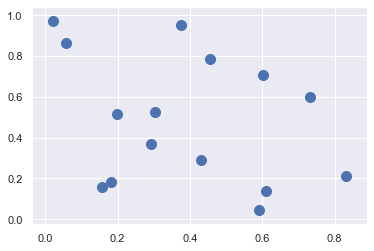

In [95]:
# Generamos 15 muestras aleatorias de puntos en 2D
np.random.seed(42)
data = np.random.rand(15, 2)

# Los pintamos
plt.scatter(data[:, 0], data[:, 1], s=100);

Calcularemos la distancia cuadrática de cada par de puntos como la suma de los cuadrados de las distancias.
Primero calculamos para cada par de puntos la diferencia entre sus coordenadas. Usamos broadcasting!

In [96]:
differences = (data[:, np.newaxis, :] - data[np.newaxis, :, :]) # (15, 1, 2) - (1, 15, 2)

# Comprobamos la pinta del array
differences.shape

(15, 15, 2)

In [97]:
square_dist = np.sum(differences ** 2, axis=-1) # sobre el último eje

# Comprobamos la diagonal!
square_dist.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Obtenemos los 2 vecinos más cercanos usando `argpartition`, y representamos todas estas relaciones:

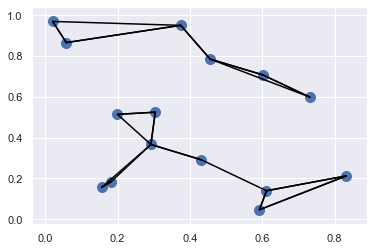

In [98]:
k = 2 # Queremos 2 vecinos, así que necesitaremos 3 puntos (el primero es uno mismo!)
nearest_partition = np.argpartition(square_dist, k+1, axis=1)

# Dibujamos los puntos y las líneas que unen cada punto con sus k vecinos más cercanos
plt.scatter(data[:, 0], data[:, 1], s=100)

for i in range(data.shape[0]):
    for j in nearest_partition[i, :k+1]:
        plt.plot(*zip(data[j], data[i]), color='black')

## Arrays estructurados

NumPy soporta también arrays para datasets heterogéneos, aunque para ese tipo de datos es recomendable usar los **Dataframes** de **pandas** :)